In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("train_data.txt", sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

In [4]:
df.shape

(54214, 3)

In [5]:
df.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(54214, 3)

In [8]:
df.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [9]:
df.drop('Title' , axis=1 , inplace=True)

<h1>Data Visualisation<h1>

In [10]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'Genre Count '}, xlabel='Genre', ylabel='Count'>

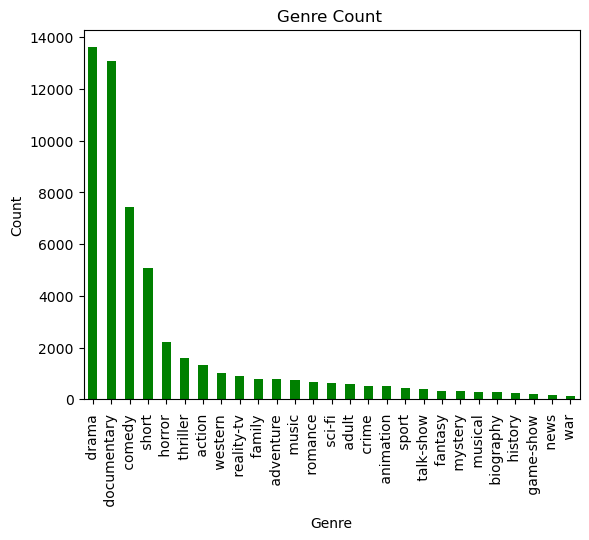

In [11]:
genre_cnt = df["Genre"].value_counts()
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Genre Count ")
genre_cnt.plot(kind='bar',color='green')

In [12]:
#merging low count data to "Others"
top_genres = df['Genre'].value_counts().nlargest(10).index

df1 = df.copy()
df1['Genre_merged'] = df['Genre'].where(df['Genre'].isin(top_genres), 'Others')
df1.head()

,Genre,Description,Genre_merged
1,drama,Listening in to a conversation between his do...,drama
2,thriller,A brother and sister with a past incestuous r...,thriller
3,adult,As the bus empties the students for their fie...,Others
4,drama,To help their unemployed father make ends mee...,drama
5,drama,The film's title refers not only to the un-re...,drama


<Axes: title={'center': 'Genre Count '}, xlabel='Genre', ylabel='Count'>

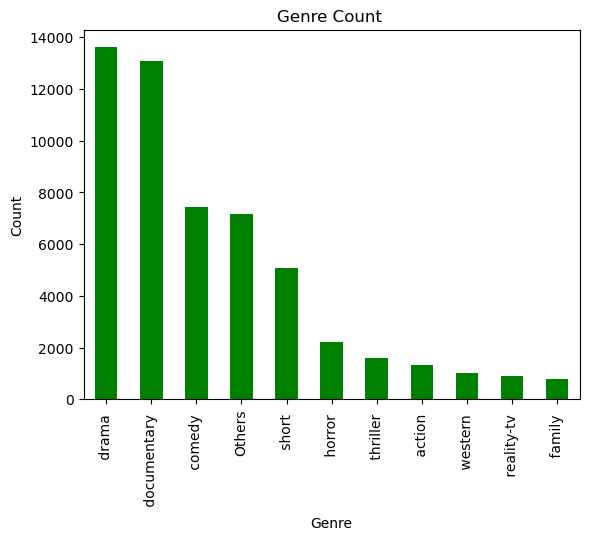

In [13]:
genre_cnt = df1["Genre_merged"].value_counts()
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Genre Count ")
genre_cnt.plot(kind='bar',color='green')

In [14]:
#Encoding genre data
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df1['Genre_encoded'] = encoder.fit_transform(df1['Genre_merged'])
df1.head()

,Genre,Description,Genre_merged,Genre_encoded
1,drama,Listening in to a conversation between his do...,drama,3
2,thriller,A brother and sister with a past incestuous r...,thriller,8
3,adult,As the bus empties the students for their fie...,Others,10
4,drama,To help their unemployed father make ends mee...,drama,3
5,drama,The film's title refers not only to the un-re...,drama,3


In [15]:
#description data cleaning
import re

punctuation_pattern = r'[.!?;:"\-\(\)\[\]{}]'

def text_cleaning(text_data):
    text_data = text_data.lower()
    text_data = re.sub(r'\d+', '', text_data)
    text_data = re.sub(punctuation_pattern, ' ', text_data)
    return text_data

In [16]:
df2 = df1.copy()
df2['Clean_Description']=df1['Description'].apply(lambda x:text_cleaning(x))
df2.head()

,Genre,Description,Genre_merged,Genre_encoded,Clean_Description
1,drama,Listening in to a conversation between his do...,drama,3,listening in to a conversation between his do...
2,thriller,A brother and sister with a past incestuous r...,thriller,8,a brother and sister with a past incestuous r...
3,adult,As the bus empties the students for their fie...,Others,10,as the bus empties the students for their fie...
4,drama,To help their unemployed father make ends mee...,drama,3,to help their unemployed father make ends mee...
5,drama,The film's title refers not only to the un-re...,drama,3,the film's title refers not only to the un re...


In [17]:

X = df2['Clean_Description']
Y = df2['Genre_encoded']

In [18]:
#encoding description data using tf_idf
from sklearn.feature_extraction.text import TfidfVectorizer

vector = TfidfVectorizer()
tfidf_matrix = vector.fit_transform(X)

<h1>Model building<h1>

In [19]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,Y_train ,Y_test = train_test_split(tfidf_matrix,Y ,test_size = 0.35 , random_state=10)

<h1>MultinomialNB<h1>

In [20]:
from sklearn.naive_bayes import MultinomialNB

Multinomial_NB = MultinomialNB()
Multinomial_NB.fit(X_train ,Y_train)
print("Train Accuracy: ",Multinomial_NB.score(X_train ,Y_train))
print("Test Accuracy: ",Multinomial_NB.score(X_test ,Y_test))

Train Accuracy:  0.46434348307273193
Test Accuracy:  0.44537549407114624


In [21]:
from sklearn.metrics import classification_report
y_pred = Multinomial_NB.predict(X_test)
print(classification_report(y_pred ,Y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.02      0.52      0.04       110
           2       0.89      0.55      0.68      7544
           3       0.89      0.37      0.53     11258
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      1.00      0.00         1
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.02      0.81      0.04        62

    accuracy                           0.45     18975
   macro avg       0.17      0.30      0.12     18975
weighted avg       0.88      0.45      0.58     18975



C:\Users\fractal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fractal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fractal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h1>Random Forest<h1>


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state = 42)
rf.fit(X_train,Y_train)
print("Train Accuracy: ",rf.score(X_train ,Y_train))
print("Test Accuracy: ",rf.score(X_test ,Y_test))

In [24]:
y_pred = rf.predict(X_test)
print(classification_report(y_pred ,Y_test))

              precision    recall  f1-score   support

           0       0.01      1.00      0.01         3
           1       0.17      0.61      0.27       736
           2       0.90      0.53      0.67      7825
           3       0.83      0.40      0.54      9769
           4       0.02      0.86      0.04         7
           5       0.02      0.83      0.04        18
           6       0.00      0.00      0.00         0
           7       0.02      0.77      0.04        48
           8       0.00      1.00      0.00         1
           9       0.23      0.99      0.37        78
          10       0.12      0.59      0.19       490

    accuracy                           0.47     18975
   macro avg       0.21      0.69      0.20     18975
weighted avg       0.81      0.47      0.57     18975


C:\Users\fractal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fractal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fractal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h1>Logistic Regression<h1>


In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)
print("Train Accuracy: ",lr.score(X_train ,Y_train))
print("Test Accuracy: ",lr.score(X_test ,Y_test))

Train Accuracy:  0.7482051136524873
Test Accuracy:  0.5937812911725955


C:\Users\fractal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
y_pred = lr.predict(X_test)
print(classification_report(y_pred ,Y_test))

              precision    recall  f1-score   support

           0       0.11      0.63      0.19        79
           1       0.54      0.57      0.55      2500
           2       0.86      0.68      0.76      5865
           3       0.78      0.54      0.64      6815
           4       0.01      0.50      0.02         6
           5       0.49      0.75      0.59       490
           6       0.10      0.73      0.18        44
           7       0.26      0.56      0.35       802
           8       0.06      0.47      0.11        76
           9       0.60      0.96      0.74       211
          10       0.40      0.48      0.43      2087

    accuracy                           0.59     18975
   macro avg       0.38      0.63      0.42     18975
weighted avg       0.69      0.59      0.63     18975
